In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

1. find the linear regression equation 


In [3]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [4]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [5]:
## ploting the data to find linear

Text(0, 0.5, 'ground temp score')

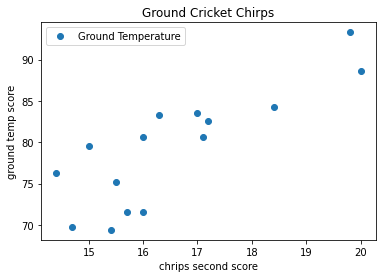

In [6]:
## 2.Chart the original data and the equation on the chart
from pandas.io.formats import style
df.plot(x='Chirps/Second',y='Ground Temperature',style='o')
plt.title('Ground Cricket Chirps')
plt.xlabel('chrips second score')
plt.ylabel('ground temp score')


In [7]:
df.corr()
#There is a linear relationship between Chirps/Second and Ground Temperature we can go ahead and develop a linear regression model. No transformation required.

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [8]:
## SPLITING DATA
temp=df.drop("Chirps/Second", axis='columns')
chirps=df["Chirps/Second"]

# split the data for training and testing
from sklearn.model_selection import train_test_split
temp_train,temp_test,chirps_train,chirps_test = train_test_split(temp,chirps,test_size=0.2,random_state=2)
#print(temp_train.shape,chirps_train.shape,temp_test.shape,chirps_test.shape)
x_train=temp_train.values.reshape(-1,1)
y_train=chirps_train.values.reshape(-1,1)
x_test=temp_test.values.reshape(-1,1)
y_test=chirps_test.values.reshape(-1,1)

##modelling

In [9]:
from sklearn.linear_model import LinearRegression
regre =  LinearRegression()

regre.fit(x_train,y_train)

LinearRegression()

In [10]:
print(regre.intercept_) #c
print(regre.coef_) #m 
#fromula of linear m.x+c

[0.60051489]
[[0.20119124]]


In [11]:
y_pred = regre.predict(x_test)
y_pred

array([[17.21891123],
       [16.81652876],
       [15.73009607]])

## evalution martric

In [12]:
#3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. 
# it greterthan 0.8 
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9265616592526871


In [13]:
# 4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
ron=(95*regre.coef_)+regre.intercept_
print(ron)

[[19.7136826]]


In [14]:
# 5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?
re=18-regre.intercept_
re/regre.coef_

array([[86.48231997]])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [15]:
bvsb = pd.read_fwf("brain_body.txt")
bvsb.head

<bound method NDFrame.head of       Brain   Body
0     3.385   44.5
1     0.480   15.5
2     1.350    8.1
3   465.000  423.0
4    36.330  119.5
..      ...    ...
57  160.000  169.0
58    0.900    2.6
59    1.620   11.4
60    0.104    2.5
61    4.235   50.4

[62 rows x 2 columns]>

In [16]:
data= pd.DataFrame(bvsb)
data.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [17]:
data.isnull().sum()

Brain    0
Body     0
dtype: int64

In [18]:
import math
x=np.log2(data.Brain)
y=np.log2(data.Body)

# split the training and testing data
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=2)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [19]:
from sklearn.linear_model import LinearRegression
regre =  LinearRegression()

regre.fit(x_train,y_train)

LinearRegression()

In [20]:
print(regre.intercept_) #c
print(regre.coef_) #m 
#fromula of linear m.x+c

[3.08344449]
[[0.76898844]]


In [21]:
y_pred = regre.predict(x_test)
y_pred

array([[ 4.63520311],
       [ 4.43621499],
       [ 7.62577509],
       [ 8.71392257],
       [ 5.6379688 ],
       [ 2.42019467],
       [ 7.02780385],
       [ 8.99964704],
       [ 1.67119624],
       [12.84960244],
       [ 2.26916748],
       [ 2.76428545],
       [ 3.61865569]])

In [22]:
## 1. Find the linear regression equation for this data for brain weight to body weight.

# Equation of the model
print("coffecient",regre.coef_)
print("Intercept",regre.intercept_)


coffecient [[0.76898844]]
Intercept [3.08344449]


Text(0, 0.5, 'body')

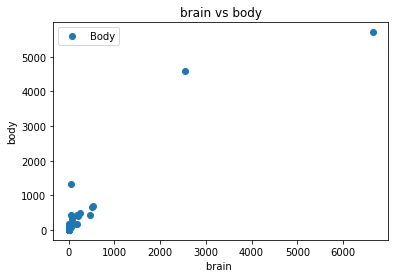

In [23]:
## 2. Chart the original data and the equation on the chart.
# plot the graph


from pandas.io.formats import style
data.plot(x='Brain',y='Body',style='o')
plt.title('brain vs body')
plt.xlabel('brain ')
plt.ylabel('body')

In [24]:
#3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. 
# it greterthan 0.8 
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8838083775622344


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [25]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [26]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


##Sex. 1 for female, 0 for male.

In [27]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [28]:
##spliting data
x=df.drop("Salary", axis='columns')
y=df["Salary"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

In [29]:
from sklearn.linear_model import LinearRegression
regre =  LinearRegression()

regre.fit(x_train,y_train)

LinearRegression()

In [30]:
print(regre.intercept_) #c
print(regre.coef_) #m 
#fromula of linear m.x+c

11145.951484209072
[ 1620.45475888  5885.54105153   447.90120943 -1344.41394125
  -146.1842506 ]


In [31]:
y_pred = regre.predict(x_test)
y_pred

array([16893.94642979, 18844.16352035, 19016.02391215, 16893.94642979,
       17910.96727101, 33539.24216213])

In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
37,17095,16893.946430
36,18304,18844.163520
32,23713,19016.023912
39,17600,16893.946430
47,15350,17910.967271
0,36350,33539.242162


In [33]:
print("Intercept: ", regre.intercept_)
print("Coefficients:")
list(zip(x, regre.coef_))

Intercept:  11145.951484209072
Coefficients:


[('Sex', 1620.4547588761363),
 ('Rank', 5885.541051525828),
 ('Year', 447.90120942534213),
 ('Degree', -1344.413941245155),
 ('YSdeg', -146.18425060116738)]

In [34]:
# 1. Find the linear regression equation for this data using columns 1-5 to column 6.
Y=(x_test*regre.coef_)+regre.intercept_
print(Y)

             Sex          Rank          Year        Degree         YSdeg
37  11145.951484  17031.492536  12937.556322   9801.537543  10561.214482
36  12766.406243  17031.492536  14729.161160   9801.537543   9099.371976
32  11145.951484  17031.492536  15177.062369  11145.951484   9099.371976
39  11145.951484  17031.492536  12937.556322   9801.537543  10561.214482
47  12766.406243  17031.492536  12041.753903   9801.537543  10853.582983
0   11145.951484  28802.574639  22343.481720   9801.537543   6029.502713


In [35]:
## 2.Find the selection of columns with the best  R2  score.
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

print("Coefficients:")
list(zip(x, regre.coef_))

## since the coeffecient value of degree and YSdeg have is negative,we can conclude that sex, Rank, Year are the best columns 

R2- SCORE: 0.8787350351714383
Coefficients:


[('Sex', 1620.4547588761363),
 ('Rank', 5885.541051525828),
 ('Year', 447.90120942534213),
 ('Degree', -1344.413941245155),
 ('YSdeg', -146.18425060116738)]

In [40]:
## 3.Report whether sex is a factor in salary.
corr = df.corr()
corr


,Actual,Predicted
Actual,1.000000,0.954946
Predicted,0.954946,1.000000
